### Data
ene.026 GCAM Projections <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/ene_026_gcam_projections<br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: 8905d98e-f825-432c-b43d-7b37fe7e6dcd <br>
https://resourcewatch.org/embed/widget/8905d98e-f825-432c-b43d-7b37fe7e6dcd

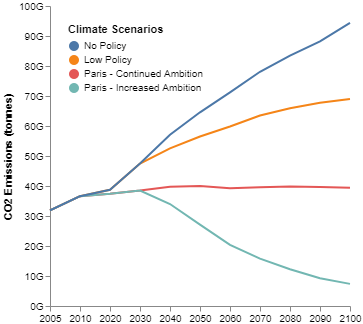

In [2]:
specV3=json.loads("""
{
  "interaction_config": [
    {
      "config": {
        "fields": [
          {
            "format": ".2s",
            "type": "number",
            "property": "CO2 Emissions (t)",
            "column": "datum.y"
          },
          {
            "type": "string",
            "property": "Scenario",
            "column": "datum.c"
          },
          {
            "type": "string",
            "property": "Year",
            "column": "datum.x"
          }
        ]
      },
      "name": "tooltip"
    }
  ],
  "legends": [
    {
      "orient": "top-left",
      "fill": "color",
      "title": "Climate Scenarios"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "enter": {
              "strokeWidth": {
                "value": 2
              },
              "stroke": {
                "field": "c",
                "scale": "color"
              },
              "y": {
                "field": "y",
                "scale": "y"
              },
              "x": {
                "field": "x",
                "scale": "x"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "interactive": false,
          "type": "line"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "lines"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        }
      },
      "transform": [
        {
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "pointss"
      },
      "type": "path",
      "name": "cell"
    }
  ],
  "axes": [
    {
      "scale": "x",
      "labelOverlap": "parity",
      "orient": "bottom"
    },
    {
      "scale": "y",
      "labelOverlap": "parity",
      "orient": "left",
      "format": ".0s",
      "title": "CO2 Emissions (tonnes)"
    }
  ],
  "scales": [
    {
      "domain": {
        "field": "x",
        "data": "table"
      },
      "range": "width",
      "type": "point",
      "name": "x"
    },
    {
      "domain": {
        "field": "y",
        "data": "table"
      },
      "zero": true,
      "nice": true,
      "range": "height",
      "type": "linear",
      "name": "y"
    },
    {
      "domain": [
        "No Policy",
        "Low Policy",
        "Paris - Continued Ambition",
        "Paris - Increased Ambition"
      ],
      "range": "category",
      "type": "ordinal",
      "name": "color"
    }
  ],
  "data": [
    {
      "transform": [
        {
          "expr": "slice(datum.x,0,4)",
          "as": "x",
          "type": "formula"
        }
      ],
      "format": {
        "type": "json",
        "property": "rows"
      },
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT datetime AS x, yr_data*1000000 AS y, scenario AS scenario, CASE WHEN scenario='Ref' THEN 'No Policy' WHEN scenario='No_Paris' THEN 'Low Policy' WHEN scenario='Paris' THEN 'Paris - Continued Ambition' WHEN scenario='Paris_plus' THEN 'Paris - Increased Ambition' END AS c FROM ene_026_gcam_projections WHERE esp_indicator_name = 'Emissions|CO2' AND region = 'World' ORDER BY scenario ASC, datetime ASC",
      "name": "table"
    },
    {
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ],
      "source": "table",
      "name": "dots"
    }
  ],
  "signals": [
    {
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ],
      "value": null,
      "name": "hover"
    }
  ],
  "autosize": {
    "contains": "padding",
    "resize": true,
    "type": "pad"
  }
}
""")
vega4view=dict(specV3)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

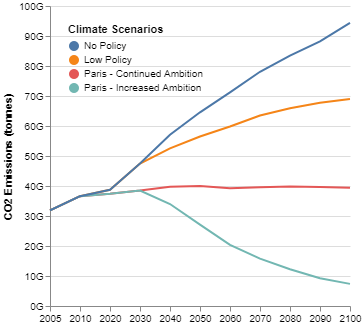

In [6]:
specV3=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {
    "contains": "padding",
    "resize": true,
    "type": "pad"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT datetime AS x, yr_data*1000000 AS y, scenario AS scenario, CASE WHEN scenario='Ref' THEN 'No Policy' WHEN scenario='No_Paris' THEN 'Low Policy' WHEN scenario='Paris' THEN 'Paris - Continued Ambition' WHEN scenario='Paris_plus' THEN 'Paris - Increased Ambition' END AS c FROM ene_026_gcam_projections WHERE esp_indicator_name = 'Emissions|CO2' AND region = 'World' ORDER BY scenario ASC, datetime ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "formula",
          "as": "x",
          "expr": "slice(datum.x,0,4)"
        }
      ]
    },
    {
      "name": "dots",
      "source": "table",
      "transform": [
        {
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y",
          "type": "filter"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "domain": {
        "field": "x",
        "data": "table"
      },
      "range": "width"
    },
    {
      "name": "y",
      "type": "linear",
      "domain": {
        "field": "y",
        "data": "table"
      },
      "range": "height",
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": [
        "No Policy",
        "Low Policy",
        "Paris - Continued Ambition",
        "Paris - Increased Ambition"
      ],
      "range": "category"
    }
  ],
  "axes": [
    {
      "scale": "x",
      "labelOverlap": "parity",
      "orient": "bottom",
      "zindex": 1
    },
    {
      "scale": "y",
      "labelOverlap": "parity",
      "orient": "left",
      "format": ".0s",
      "grid": true,
      "zindex": 0,
      "title": "CO2 Emissions (tonnes)"
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "encode": {
            "enter": {
              "strokeWidth": {
                "value": 2
              },
              "stroke": {
                "field": "c",
                "scale": "color"
              },
              "y": {
                "field": "y",
                "scale": "y"
              },
              "x": {
                "field": "x",
                "scale": "x"
              }
            }
          },
          "from": {
            "data": "series"
          },
          "interactive": false,
          "type": "line"
        }
      ],
      "from": {
        "facet": {
          "groupby": "c",
          "data": "table",
          "name": "series"
        }
      },
      "type": "group",
      "name": "lines"
    },
    {
      "encode": {
        "enter": {
          "opacity": {
            "value": 0
          },
          "y": {
            "field": "y",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "table"
      },
      "type": "symbol",
      "interactive": false,
      "name": "pointss"
    },
    {
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          },
          "fill": {
            "field": "c",
            "scale": "color"
          }
        },
        "enter": {
          "y": {
            "field": "y",
            "scale": "y"
          },
          "x": {
            "field": "x",
            "scale": "x"
          }
        }
      },
      "from": {
        "data": "dots"
      },
      "type": "symbol",
      "interactive": false,
      "name": "points"
    },
    {
      "name": "cell",
      "type": "path",
      "from": {
        "data": "pointss"
      },
      "transform": [
        {
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        },
        "hover": {
          "tooltip": {
            "signal": "{'CO2 Emissions':format(hover.datum.y,'.3s')+'t', 'Scenario':hover.datum.c, 'Year':hover.datum.x}"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "orient": "top-left",
      "fill": "color",
      "title": "Climate Scenarios"
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)